In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

In [ ]:
#mount gdrive directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1
#Read data from excel file

#load available data entriesc
fileNameFullPath='/content/drive/MyDrive/MachineLearning/Exc1/Dataset2Use_Assignment1.xlsx'
df = pd.read_excel(fileNameFullPath)

In [ ]:
#Creating variables to be used for the next queries...

# Print column titles
column_titles = df.columns
print(column_titles)

# Assuming column_titles[11] holds '1' or '2' class labels
class_column = column_titles[11]

# Create a dictionary to map '1' and '2' to meaningful labels (optional)
class_labels = { '1': 'Healthy', '2': 'Bankrupt'}  # Customize labels if needed
df[class_column]=df[class_column].astype(str)

Index(['365* ( Β.Υ / Κοστ.Πωλ )', 'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
       'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
       ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ', '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
       'Συν.Υποχρ/Συν.Ενεργ', 'Διάρκεια Παραμονής Αποθεμάτων',
       'Λογαριθμος Προσωπικού', 'ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ', 'ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ',
       'ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', 'ΕΤΟΣ'],
      dtype='object')


In [ ]:
healthyperyear = df[df[class_column] == "1"].groupby(column_titles[12]).size()
bankruptperyear = df[df[class_column] == "2"].groupby(column_titles[12]).size()
print(healthyperyear)
print(bankruptperyear)

ΕΤΟΣ
2006    2748
2007    2846
2008    2731
2009    2143
dtype: int64
ΕΤΟΣ
2006    52
2007    53
2008    99
2009    44
dtype: int64


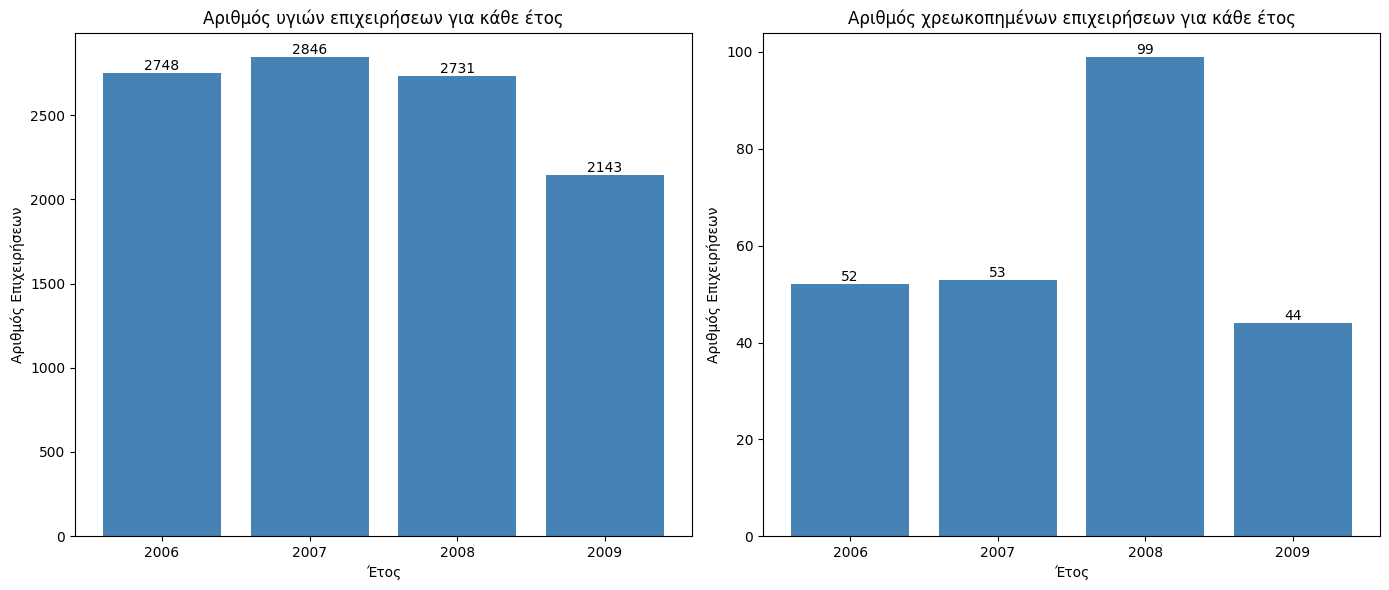

In [ ]:
#2
#show figures

# Creating a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: healthies per year
axes[0].bar(healthyperyear.index, healthyperyear.values, color=['steelblue'])
axes[0].set_title('Αριθμός υγιών επιχειρήσεων για κάθε έτος')
axes[0].set_xlabel('Έτος')
axes[0].set_ylabel('Αριθμός Επιχειρήσεων')
axes[0].set_xticks(healthyperyear.index)

# Adding values ​​above the bars
for bar in axes[0].containers[0]:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

# Second subplot: bankrupts per year
axes[1].bar(bankruptperyear.index, bankruptperyear.values, color=['steelblue'])
axes[1].set_title('Αριθμός χρεωκοπημένων επιχειρήσεων για κάθε έτος')
axes[1].set_xlabel('Έτος')
axes[1].set_ylabel('Αριθμός Επιχειρήσεων')
axes[1].set_xticks(bankruptperyear.index)

# Adding values ​​above the bars
for bar in axes[1].containers[0]:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

# printing figues for healthy and bankrupt for each year
plt.tight_layout()
plt.show()

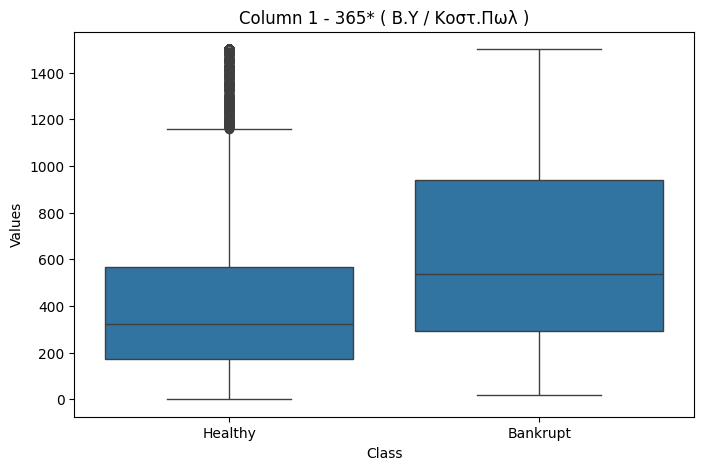

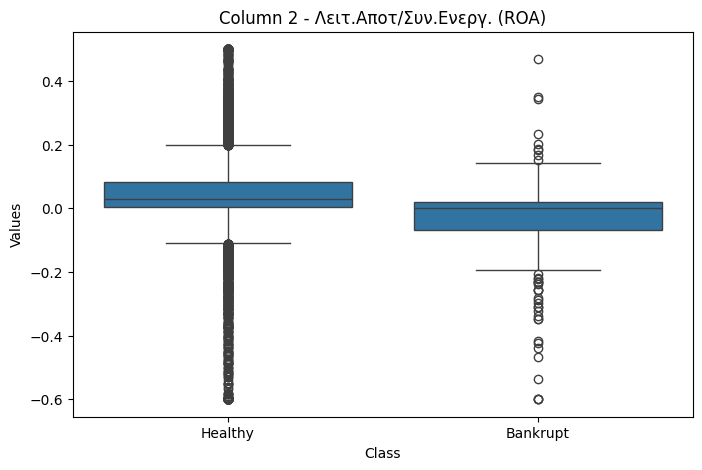

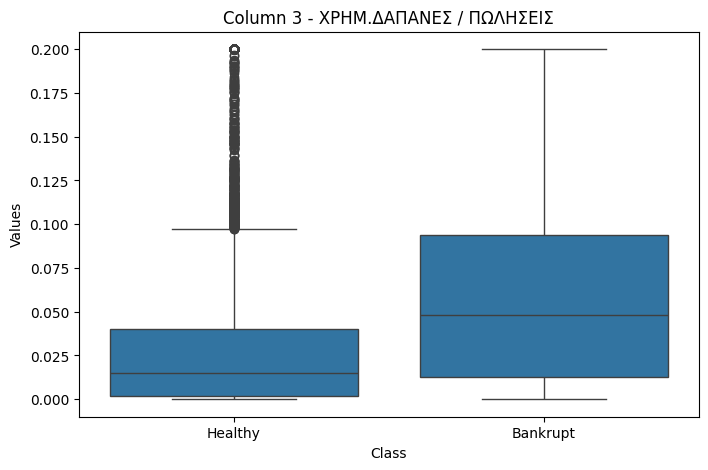

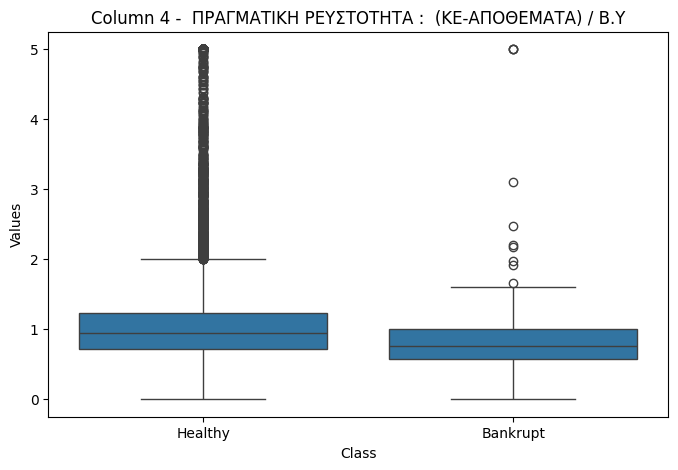

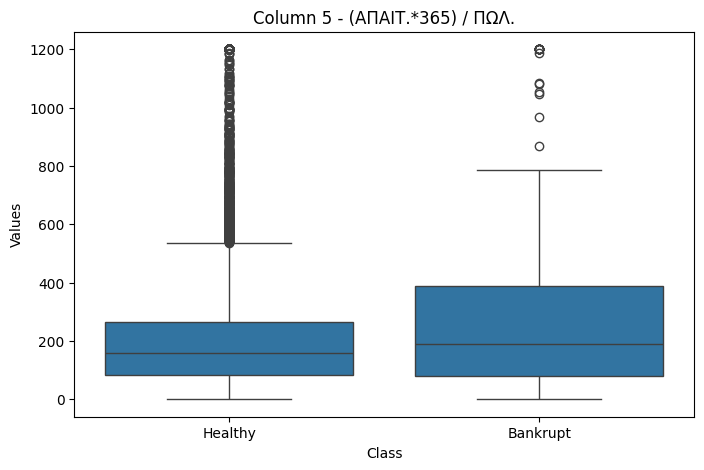

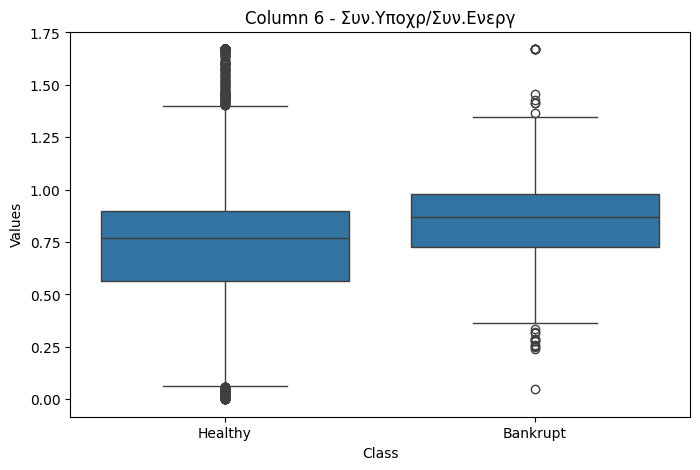

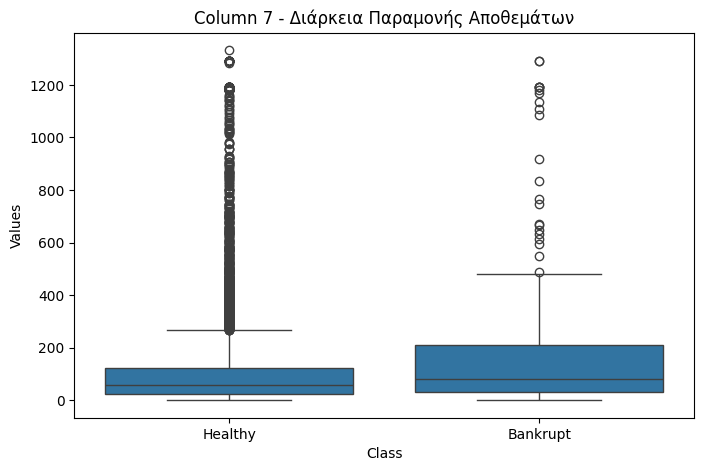

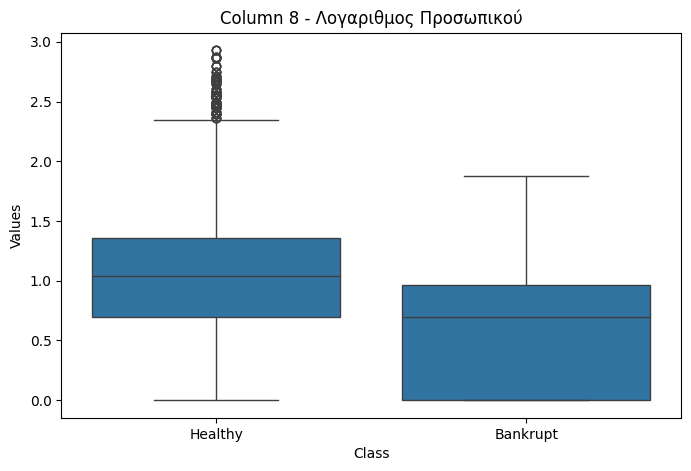

In [ ]:
# Iterate through each column and create a separate box plot for each class
for col_idx in range(0, 8):
    plt.figure(figsize=(8, 5))  # Adjust the figsize as needed

    # Create a box plot using seaborn, grouping by the 'Class' column
    sns.boxplot(x=column_titles[11], y=df.columns[col_idx], data=df)

    plt.title(f"Column {col_idx + 1} - {column_titles[col_idx]}")
    plt.xlabel('Class')
    plt.ylabel('Values')

    # Replace numeric ticks with corresponding labels
    plt.xticks(ticks=[0, 1], labels=['Healthy', 'Bankrupt'])

    #printing boxplots for each index
    #through boxplots we can see the min, max and average values
    plt.show()

In [ ]:
#3
# Check for NaN values
nan_report = df.isna().sum()

# Calculate the percentage of NaN values
nan_percentage_report = (df.isna().mean() * 100).round(2)

# Concatenate the reports side by side
combined_report = pd.concat([nan_report, nan_percentage_report], axis=1, keys=['NaN Count', 'NaN Percentage'])

# Display the combined report
print("Combined NaN Report:")
print(combined_report)

# Provide a relative message to the user
if combined_report.values.max() == 0:
    print("\nGood news! There are no missing values in the DataFrame.")
else:
    print("\nPlease be aware that there are missing values in the DataFrame. Consider handling them appropriately.")

Combined NaN Report:
                                                NaN Count  NaN Percentage
365* ( Β.Υ / Κοστ.Πωλ )                                 0             0.0
Λειτ.Αποτ/Συν.Ενεργ. (ROA)                              0             0.0
ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ                                 0             0.0
 ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ          0             0.0
(ΑΠΑΙΤ.*365) / ΠΩΛ.                                     0             0.0
Συν.Υποχρ/Συν.Ενεργ                                     0             0.0
Διάρκεια Παραμονής Αποθεμάτων                           0             0.0
Λογαριθμος Προσωπικού                                   0             0.0
ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ                                        0             0.0
ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ                                       0             0.0
ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ                                  0             0.0
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)                           0             0.0
ΕΤΟΣ             

In [ ]:
#now create input and output data
inputData = df.iloc[:, 0:11].values

# Define a lambda function for conversion
convert_class = lambda x: 1 if x == '2' else 0

# Apply the lambda function to the class label column
outputData = df[column_titles[11]].apply(convert_class).values
# outputData = df.iloc[:, 1].values

In [ ]:
#let's discuss about value range
np.set_printoptions(precision=4, suppress=True)  # Set precision and disable scientific notation
print("maximum values, per feature are: ", np.max(inputData, axis=0))
print("minimum values, per feature are: ", np.min(inputData, axis=0))

maximum values, per feature are:  [1500.        0.5       0.2       5.     1200.        1.67   1332.1055
    2.9299    1.        1.        1.    ]
minimum values, per feature are:  [ 0.6544 -0.6     0.      0.0007  0.      0.0004  0.      0.      0.
  0.      0.    ]


In [ ]:
#4
#running a normalization process (mapminmax)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
inputData = scaler.fit_transform(inputData)


In [ ]:
#value range
print("maximum values, per feature are: ", np.max(inputData, axis=0))
print("minimum values, per feature are: ", np.min(inputData, axis=0))

maximum values, per feature are:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
minimum values, per feature are:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#5
#using Stratified kfold

#create some indexes for the balanced dataset
from sklearn.model_selection import StratifiedKFold

n_splits = 4
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=None)

# Create stratified k-fold indexes
for train_index, test_index in stratified_kfold.split(inputData, outputData):
    # Use train_index and test_index as needed
    print("Train Index:", train_index)
    print("Test Index:", test_index)

Train Index: [    0     1     2 ... 10711 10714 10715]
Test Index: [    5    14    15 ... 10689 10712 10713]
Train Index: [    0     2     3 ... 10711 10712 10713]
Test Index: [    1    11    19 ... 10710 10714 10715]
Train Index: [    1     5     8 ... 10713 10714 10715]
Test Index: [    0     2     3 ... 10706 10708 10711]
Train Index: [    0     1     2 ... 10713 10714 10715]
Test Index: [    8    13    17 ... 10705 10707 10709]


In [ ]:
#6
#for each fold print the nums of healthy and bankrupt companies

for fold, (train_index, test_index) in enumerate(stratified_kfold.split(inputData, outputData), 1):
    # Creating training and testing data
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # finding the num of  healthy and bankrupt for each set
    healthy_train = train_data[train_data[class_column] == '1']
    bankrupt_train = train_data[train_data[class_column] == '2']
    healthy_test = test_data[test_data[class_column] == '1']
    bankrupt_test = test_data[test_data[class_column] == '2']

    #printing results
    print(f"Fold {fold}:")
    print(f"  - Train Set: {len(healthy_train)} Healthy, {len(bankrupt_train)} Bankrupt")
    print(f"  - Test Set: {len(healthy_test)} Healthy, {len(bankrupt_test)} Bankrupt")
    print("-" * 50)


Fold 1:
  - Train Set: 7851 Healthy, 186 Bankrupt
  - Test Set: 2617 Healthy, 62 Bankrupt
--------------------------------------------------
Fold 2:
  - Train Set: 7851 Healthy, 186 Bankrupt
  - Test Set: 2617 Healthy, 62 Bankrupt
--------------------------------------------------
Fold 3:
  - Train Set: 7851 Healthy, 186 Bankrupt
  - Test Set: 2617 Healthy, 62 Bankrupt
--------------------------------------------------
Fold 4:
  - Train Set: 7851 Healthy, 186 Bankrupt
  - Test Set: 2617 Healthy, 62 Bankrupt
--------------------------------------------------


In [ ]:
#7
#data agjustment to 3*healthy/1*bankrupt

for fold, (train_index, test_index) in enumerate(stratified_kfold.split(inputData, outputData), 1):
    # Creating training and testing data
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # Seperating healthy and bankrupt companies on training set
    healthy_train = train_data[train_data[class_column] == '1']
    bankrupt_train = train_data[train_data[class_column] == '2']

    # Ratio control in the training set and balancing if necessary
    if len(healthy_train) > 3 * len(bankrupt_train):
        # Maximum number of healthy companies for 3:1 ratio
        max_healthy_count = 3 * len(bankrupt_train)

        # Random choosing of healthy companies
        healthy_train_balanced = healthy_train.sample(n=max_healthy_count, random_state=42)

        # Combination of balanced healthy and all bankrupt
        train_data_balanced = pd.concat([healthy_train_balanced, bankrupt_train])

        print(f"Fold {fold}: Adjusted Training Set - Υγιείς = {len(healthy_train_balanced)}, Χρεοκοπημένες = {len(bankrupt_train)}")
    else:
        train_data_balanced = train_data  # We keep the original train set if the ratio is already <= 3:1

    # Shuffle balanced training set
    train_data_balanced = train_data_balanced.sample(frac=1, random_state=42)

    # Separating healthy and bankrupt on test set
    healthy_test = test_data[test_data[class_column] == '1']
    bankrupt_test = test_data[test_data[class_column] == '2']

    # Printing final training set and test set
    print(f"Fold {fold} - Τελικό Training Set: Υγιείς = {train_data_balanced[train_data_balanced[class_column] == '1'].shape[0]}, Χρεοκοπημένες = {train_data_balanced[train_data_balanced[class_column] == '2'].shape[0]}")
    print(f"  Test Set: Υγιείς = {healthy_test.shape[0]}, Χρεοκοπημένες = {bankrupt_test.shape[0]}")
    print("-" * 50)


Fold 1: Adjusted Training Set - Υγιείς = 558, Χρεοκοπημένες = 186
Fold 1 - Τελικό Training Set: Υγιείς = 558, Χρεοκοπημένες = 186
  Test Set: Υγιείς = 2617, Χρεοκοπημένες = 62
--------------------------------------------------
Fold 2: Adjusted Training Set - Υγιείς = 558, Χρεοκοπημένες = 186
Fold 2 - Τελικό Training Set: Υγιείς = 558, Χρεοκοπημένες = 186
  Test Set: Υγιείς = 2617, Χρεοκοπημένες = 62
--------------------------------------------------
Fold 3: Adjusted Training Set - Υγιείς = 558, Χρεοκοπημένες = 186
Fold 3 - Τελικό Training Set: Υγιείς = 558, Χρεοκοπημένες = 186
  Test Set: Υγιείς = 2617, Χρεοκοπημένες = 62
--------------------------------------------------
Fold 4: Adjusted Training Set - Υγιείς = 558, Χρεοκοπημένες = 186
Fold 4 - Τελικό Training Set: Υγιείς = 558, Χρεοκοπημένες = 186
  Test Set: Υγιείς = 2617, Χρεοκοπημένες = 62
--------------------------------------------------


In [ ]:
#create a folder to store results
import os
# Specify the Drive Path
drive_path = '/content/drive/My Drive/MachineLearning/Exc1'

# Check if the folder exists, and create it if necessary
if not os.path.exists(drive_path):
    os.makedirs(drive_path)

# Check if the folder exists, and create it if necessary
figure_folder_path = os.path.join(drive_path, 'Figures')  # You can change 'Figures' to your desired folder name
if not os.path.exists(figure_folder_path):
    os.makedirs(figure_folder_path)

In [ ]:
import csv
# Create a list to store the data
csv_data = []
# Append header row
csv_data.append(["Model" , "FoldId","Set", "RatioStatus",  \
                 "Training Samples", "Bankrupted Samples",\
                 "TP", "FP" ,"TN", "FN","AUC-ROC"])

In [ ]:
#import necessary ML models and performance scores
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier #personal choice
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
#9a
#build a funcy confusion matrix
def funcy_cf_plot(cf_matrix, class_names, fullMatrixName, directoryToSave):
  #class names: list of the form ['a','b','b',etc]
  #keep two decimals
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n" for v1, v2 in
            zip(group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  #ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('Predicted company status')
  ax.set_ylabel('Actual company status ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(class_names)
  ax.yaxis.set_ticklabels(class_names)

  #save the figure to dedicated directory
  figure_path = os.path.join(directoryToSave, fullMatrixName)
  plt.savefig(figure_path)

  # Display the visualization of the Confusion Matrix.
  plt.show()

In [ ]:
# Updated `one_model_sim_function`
def one_model_sim_function(model_name, clf, X_train, y_train, X_test, y_test, fold_counter, figure_folder_path, balancing_ratio):
    print(f'. Working with classifier {model_name}')

    # Train the classifier
    start_time = time.time()
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f'. Finished training in {training_time:.4f} seconds')

    # Predictions
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)

    # Probabilities for AUC
    prob_train = clf.predict_proba(X_train)[:, 1]
    prob_test = clf.predict_proba(X_test)[:, 1]

    # Compute performance metrics
    metrics_train = calculate_metrics(y_train, pred_train, prob_train)
    metrics_test = calculate_metrics(y_test, pred_test, prob_test)

    # Print metrics
    print(f"Train Metrics: {metrics_train}")
    print(f"Test Metrics: {metrics_test}")

    # Confusion matrices
    cf_matrix_train = confusion_matrix(y_train, pred_train)
    cf_matrix_test = confusion_matrix(y_test, pred_test)

    # Plot confusion matrices
    funcy_cf_plot(cf_matrix_train, ['Healthy', 'Bankrupted'], f"{model_name}_Fold{fold_counter}_Train_{balancing_ratio}", figure_folder_path)
    funcy_cf_plot(cf_matrix_test, ['Healthy', 'Bankrupted'], f"{model_name}_Fold{fold_counter}_Test_{balancing_ratio}", figure_folder_path)
    print('. Finished saving confusion matrices.')

    # Append CSV data
    append_to_csv(model_name, fold_counter, "Train", balancing_ratio, len(y_train), sum(y_train == 1), cf_matrix_train, metrics_train['AUC'])
    append_to_csv(model_name, fold_counter, "Test", balancing_ratio, len(y_test), sum(y_test == 1), cf_matrix_test, metrics_test['AUC'])


# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1, "AUC": auc}


# Helper function to append data to CSV
def append_to_csv(model_name, fold_counter, dataset_type, balancing_ratio, sample_size, bankrupt_count, cf_matrix, auc):
    csv_data.append([
        model_name,
        fold_counter,
        dataset_type,
        balancing_ratio,
        sample_size,
        bankrupt_count,
        cf_matrix[1, 1],  # True Positives
        cf_matrix[0, 1],  # False Positives
        cf_matrix[0, 0],  # True Negatives
        cf_matrix[1, 0],  # False Negatives
        auc
    ])

In [ ]:
# List of classifiers to test
classifiers = [
    ("LDA", LinearDiscriminantAnalysis()),
    ("LR", LogisticRegression()),
    ("Ctree", DecisionTreeClassifier()),
    ("RF", RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=10)),
    ("kNN", KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')),
    ("NB", GaussianNB() ),
    ("SVM", SVC(probability=True)),
    ("GB",  GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4))
    ]

In [ ]:
foldCounter = 1
for train_index, test_index in stratified_kfold.split(inputData, outputData):

    print('We are currently in fold set no:', foldCounter)

    # Split the training and testing data
    X_train, X_test = inputData[train_index], inputData[test_index]
    y_train, y_test = outputData[train_index], outputData[test_index]

    # Create DataFrame for training set
    df_train = pd.DataFrame(X_train)
    df_train[class_column] = y_train
    healthy = df_train[df_train[class_column] == 0]
    bankrupt = df_train[df_train[class_column] == 1]

    if len(healthy) > 3 * len(bankrupt):
        # Subsampling with retention of original indexes
        healthy_downsampled = healthy.sample(n=3 * len(bankrupt), random_state=42)

        # Combine categories and shuffle
        df_balanced = pd.concat([healthy_downsampled, bankrupt]).sample(frac=1, random_state=42)

        # Update balanced training data
        X_train = df_balanced.iloc[:, :-1].values
        y_train = df_balanced.iloc[:, -1].values

        print('. Applied undersampling: New class distribution:')
        print(pd.Series(y_train).value_counts())

    # Run models
    for model_name, model in classifiers:
        one_model_sim_function(model_name, model, X_train, y_train, X_test, y_test, foldCounter, figure_folder_path, "balanced")

    # Increment fold counter
    foldCounter += 1


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#10
# Save CSV to Drive
csv_filename = "balancedDataOutcomes.csv"
csv_path = os.path.join(drive_path, csv_filename)

with open(csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)

In [ ]:
#use this code if you want to see the result of
#the models with unbalanced data
foldCounter = 1
for train_index, test_index in stratified_kfold.split(inputData, outputData):

    print('We are currently in fold set no:', foldCounter)

    # Split the dataset into training and testing subsets
    X_train, X_test = inputData[train_index], inputData[test_index]
    y_train, y_test = outputData[train_index], outputData[test_index]

    # Loop through each classifier and run the simulation
    for model_name, model in classifiers:
        one_model_sim_function(model_name, model, X_train, y_train, X_test, y_test, foldCounter, figure_folder_path, "unbalanced")

    # Increment the fold counter
    foldCounter += 1


Output hidden; open in https://colab.research.google.com to view.